In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier , VotingRegressor

Classification

In [18]:
x,y = make_moons(n_samples=1000, noise=.2)
data  = {"x1":x[:,0] , "x2": x[:,1], "y":y}
df = pd.DataFrame(data)
df

,x1,x2,y
0,2.000461,0.003175,1
1,0.855993,0.666423,0
2,0.708790,0.139088,0
3,-0.960729,0.746563,0
4,-0.175820,1.187479,0
...,...,...,...
995,0.316465,0.043925,1
996,0.098281,0.822298,1
997,-0.877751,0.214024,0
998,-0.832084,0.451711,0


<Axes: xlabel='x1', ylabel='x2'>

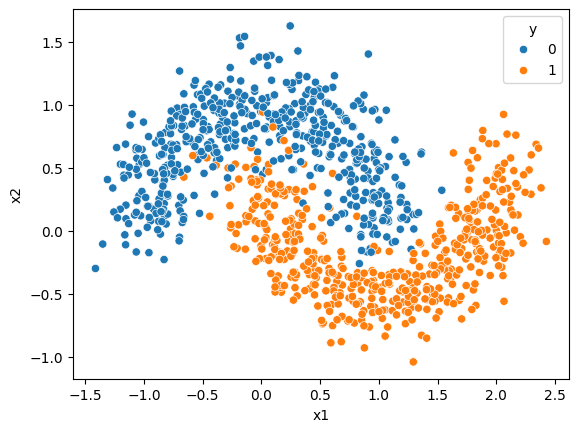

In [19]:
sns.scatterplot(x="x1" , y = "x2" ,data=df , hue = "y")

In [26]:
xx = df.iloc [:,:-1]
yy = df.iloc [y]

x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=.2 , random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100)

sv = SVC()
sv.fit(x_train,y_train)
print(sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100)

100.0 94.5
97.25 96.0
86.375 84.5


In [35]:
lst =[ ("DecisionTree",DecisionTreeClassifier()) , ("SVC", SVC()) , ("GaussianNB",GaussianNB()) ]


vc = VotingClassifier(lst)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                             ('SVC', SVC()), ('GaussianNB', GaussianNB())])

In [36]:
print(vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100)

98.0 95.0


In [40]:
voting = {"dt": dt.predict(x_test), "svm": sv.predict(x_test) , "gnb": gnb.predict(x_test), "voting": vc.predict(x_test)}

data = pd.DataFrame(voting)
data

,dt,svm,gnb,voting
0,0,0,1,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,0,0,0,0
197,0,0,0,0
198,0,0,0,0


Regression

In [42]:
import kagglehub as kh

data_path = kh.dataset_download("tann22u/placement-dataset")

dataset = pd.read_csv(f"{data_path}/placement.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


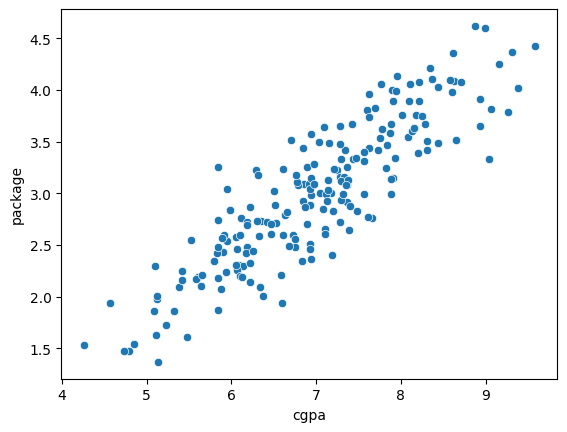

In [53]:
sns.scatterplot(x = "cgpa", y="package" ,data=dataset)
plt.show()

In [54]:
x = dataset.iloc[:,:-1]
y = dataset["package"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100)

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train)*100, dtr.score(x_test,y_test)*100)

svr = SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train)*100, svr.score(x_test,y_test)*100)



77.58339025733345 77.30984312051673
95.1559200955432 52.19733481708333
78.16909319813372 75.94945442913415


In [57]:
li =[ ("DecisionTree",DecisionTreeRegressor()) , ("SVC", SVR()) , ("Lr",LinearRegression()) ]


vr = VotingRegressor(li)
vr.fit(x_train,y_train)



VotingRegressor(estimators=[('DecisionTree', DecisionTreeRegressor()),
                            ('SVC', SVR()), ('Lr', LinearRegression())])

In [58]:
print(vr.score(x_train,y_train)*100, vr.score(x_test,y_test)*100)


87.56852979319457 75.16568331690884


In [61]:
vote = pd.DataFrame({"lr":lr.predict(x_test),"dtr":dtr.predict(x_test),"svr": svr.predict(x_test),"vr":vr.predict(x_test)})

vote

,lr,dtr,svr,vr
0,2.780313,2.920000,2.745462,2.815259
1,3.136352,3.252500,3.111375,3.166742
2,3.199521,2.920000,3.186923,3.102148
3,2.389819,2.540000,2.407183,2.445667
4,3.526847,3.990000,3.603909,3.706919
5,3.768035,4.110000,3.864755,3.914263
6,3.165065,3.330000,3.145318,3.213461
7,2.544868,2.235000,2.544422,2.441430
8,3.176550,3.330000,3.159083,3.221878
9,3.492392,3.140000,3.560946,3.397779
